<a href="https://colab.research.google.com/github/LucasMelvin15/machine_learning-projects/blob/main/04_Predicting_diabetes_Progression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Diabetes Progression Using Predictive Analytics

This project explores the Diabetes dataset from Scikit-Learn, which provides data on diabetes patients, including ten baseline variables such as age, sex, BMI, and blood pressure. The dataset's target is a quantitative measure of disease progression one year after baseline.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Load the dataset

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# Create a dictionary
diabetes_df = pd.DataFrame(diabetes["data"], columns=diabetes['feature_names'])
diabetes_df["target"] = pd.Series(diabetes["target"])
diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


2. Explore the dataset

In [ ]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
# Check for missing values
print(diabetes_df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


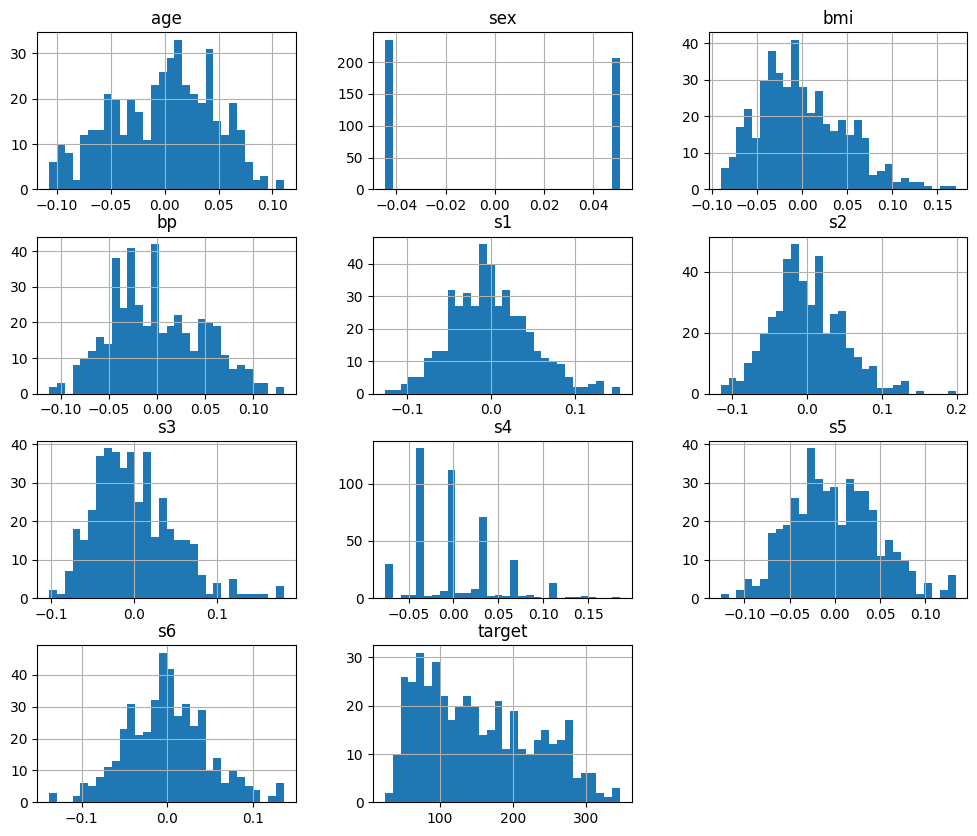

In [ ]:
# Plot distribution of features and target
diabetes_df.hist(figsize=(12, 10), bins=30)
plt.show()

In [ ]:
len(diabetes_df)

442

3. Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

# set up random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = diabetes_df.drop("target", axis=1)
y = diabetes_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


4. Model Selection

4.1 Ridge Regression

In [ ]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score on the test data
model.score(X_test, y_test)

0.41915292635986545

4.2 Random Forest Regressor to improve the model results

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# set up random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = diabetes_df.drop("target", axis=1)
y = diabetes_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.42417421495301266

4.3 Feature scalling to improve results

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
clf = RandomForestRegressor(n_estimators=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = clf.predict(X_test_scaled)

clf.score(X_test_scaled, y_test)




0.4348815839312682

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Random Forest: 0.41201643627670237
